### Check Packages Existance

In [2]:
import pip
from warnings import filterwarnings
filterwarnings("ignore")
def import_or_install(package:str):
    try:
        __import__(package)
        return 'Found'
    except ImportError:
        pip.main(['install', package]) 
        return 'Installed'
    
packages = ['pandas', 'tqdm', 'numpy','psutil', 'statsmodels']
[import_or_install(i) for i in packages]

['Found', 'Found', 'Found', 'Found', 'Found']

### Load Your Packages

In [47]:
import pandas as pd
from datetime import datetime
from tqdm import tqdm
import psutil
from numpy import mean, where, sqrt

# from sklearn.metrics import mean_squared_error
# from sklearn import ensemble
# from sklearn.model_selection import learning_curve, GridSearchCV

from tools import append_list_as_row
from IPython.display import display_html 


In [4]:
from watermark import watermark
print(watermark())
print(watermark(iversions=True, globals_=globals()))

Last updated: 2022-12-04T12:03:19.275678-05:00

Python implementation: CPython
Python version       : 3.7.15
IPython version      : 7.30.1

Compiler    : MSC v.1916 64 bit (AMD64)
OS          : Windows
Release     : 10
Machine     : AMD64
Processor   : Intel64 Family 6 Model 141 Stepping 1, GenuineIntel
CPU cores   : 16
Architecture: 64bit

psutil: 5.9.4
pandas: 1.3.5
pip   : 22.2.2



### Read in Data

In [5]:
import glob
glob.glob("./Data/703891_32.97_-96.74_*.csv")

['./Data\\703891_32.97_-96.74_2010.csv',
 './Data\\703891_32.97_-96.74_2011.csv',
 './Data\\703891_32.97_-96.74_2012.csv',
 './Data\\703891_32.97_-96.74_2013.csv',
 './Data\\703891_32.97_-96.74_2014.csv',
 './Data\\703891_32.97_-96.74_2015.csv',
 './Data\\703891_32.97_-96.74_2016.csv',
 './Data\\703891_32.97_-96.74_2017.csv']

#### Functions to Calculate Time and Space Complexity off your code
* `Time Complexity`: How much time does it take to run the code?
* `Space Complexity`: How much memory did your code eat up fo computation?

In [6]:
import time

def time_it():
    return  pd.to_datetime(time.time(),unit = 's')
def memory()->str:
    return print('used: {}% free: {:.2f}GB'.format(psutil.virtual_memory().percent, float(psutil.virtual_memory().free)/1024**3))#@ 
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H %M')

#### Read Method 1

In [7]:
start = time_it()
start_memory = float(psutil.virtual_memory().free)/1024**3

all_data = pd.DataFrame()
for f in tqdm(glob.glob("./Data/703891_32.97_-96.74_*.csv")):
    df = pd.read_csv(f, header = 2, engine = 'c',  parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], index_col=0, date_parser=parse)
    all_data = all_data.append(df)
    
end_memory = float(psutil.virtual_memory().free)/1024**3
end = time_it()
loop_time = end - start
loop_memory = abs(start_memory - end_memory)

100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.47it/s]


#### Read Method 2

In [8]:
start = time_it()
start_memory = float(psutil.virtual_memory().free)/1024**3

df_anotherway = pd.concat([pd.read_csv(f, header = 2, engine = 'c', parse_dates = [['Year', 'Month', 'Day', 'Hour', 'Minute']], 
                                       index_col=0, date_parser=parse) for f in glob.glob("./Data/703891_32.97_-96.74_*.csv")])

end_memory = float(psutil.virtual_memory().free)/1024**3
end = time_it()
list_comprehension = end - start
list_comprehension_memory = abs(start_memory - end_memory)

In [9]:
df_anotherway.index

DatetimeIndex(['2010-01-01 00:00:00', '2010-01-01 00:30:00',
               '2010-01-01 01:00:00', '2010-01-01 01:30:00',
               '2010-01-01 02:00:00', '2010-01-01 02:30:00',
               '2010-01-01 03:00:00', '2010-01-01 03:30:00',
               '2010-01-01 04:00:00', '2010-01-01 04:30:00',
               ...
               '2017-12-31 19:00:00', '2017-12-31 19:30:00',
               '2017-12-31 20:00:00', '2017-12-31 20:30:00',
               '2017-12-31 21:00:00', '2017-12-31 21:30:00',
               '2017-12-31 22:00:00', '2017-12-31 22:30:00',
               '2017-12-31 23:00:00', '2017-12-31 23:30:00'],
              dtype='datetime64[ns]', name='Year_Month_Day_Hour_Minute', length=140256, freq=None)

* Check which reading method is faster:

In [10]:
pd.DataFrame({'Looping':{'Nanoseconds': loop_time.nanoseconds, 'Microseconds': loop_time.microseconds
                        ,'Seconds': loop_time.seconds, 'Memory': '%d MB' % (loop_memory* 1024)},
              'Vectorization':{'Nanoseconds': list_comprehension.nanoseconds, 'Microseconds': list_comprehension.microseconds
                        ,'Seconds': list_comprehension.seconds, 'Memory': '%d MB' % (list_comprehension_memory* 1024)}})

,Looping,Vectorization
Nanoseconds,280,24
Microseconds,825121,587457
Seconds,1,1
Memory,30 MB,18 MB


In [11]:
all_data.index.name = 'timestamp'

In [12]:
all_data.tail()

,DHI,DNI,GHI,Clearsky DHI,Clearsky DNI,Clearsky GHI,Cloud Type,Dew Point,Solar Zenith Angle,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure
timestamp,,,,,,,,,,,,,,,,
2017-12-31 21:30:00,0,0,0,0,0,0,8,5,139.24,0.145,1.3,1.329,351.9,77.62,9,980.0
2017-12-31 22:00:00,0,0,0,0,0,0,8,5,145.51,0.145,1.3,1.356,4.3,78.44,9,980.0
2017-12-31 22:30:00,0,0,0,0,0,0,8,5,151.70,0.145,1.2,1.402,4.3,83.92,8,980.0
2017-12-31 23:00:00,0,0,0,0,0,0,8,5,157.73,0.145,1.2,1.449,21.5,85.77,8,980.0
2017-12-31 23:30:00,0,0,0,0,0,0,1,5,163.35,0.145,1.1,1.520,21.5,85.76,8,980.0


In [13]:
# DHI, DNI and Solar Angle have a linear derrivation with GHI. The clear sky variables are also related to the GHI if the sky is clear which is a lookahead bias
all_data.drop(['DHI','DNI', 'Clearsky DHI', 'Clearsky DNI', 'Clearsky GHI','Solar Zenith Angle'], axis = 1,inplace = True)

In [14]:
all_data.isnull().sum(), all_data.dtypes

(GHI                   0
 Cloud Type            0
 Dew Point             0
 Surface Albedo        0
 Wind Speed            0
 Precipitable Water    0
 Wind Direction        0
 Relative Humidity     0
 Temperature           0
 Pressure              0
 dtype: int64,
 GHI                     int64
 Cloud Type              int64
 Dew Point               int64
 Surface Albedo        float64
 Wind Speed            float64
 Precipitable Water    float64
 Wind Direction        float64
 Relative Humidity     float64
 Temperature             int64
 Pressure              float64
 dtype: object)

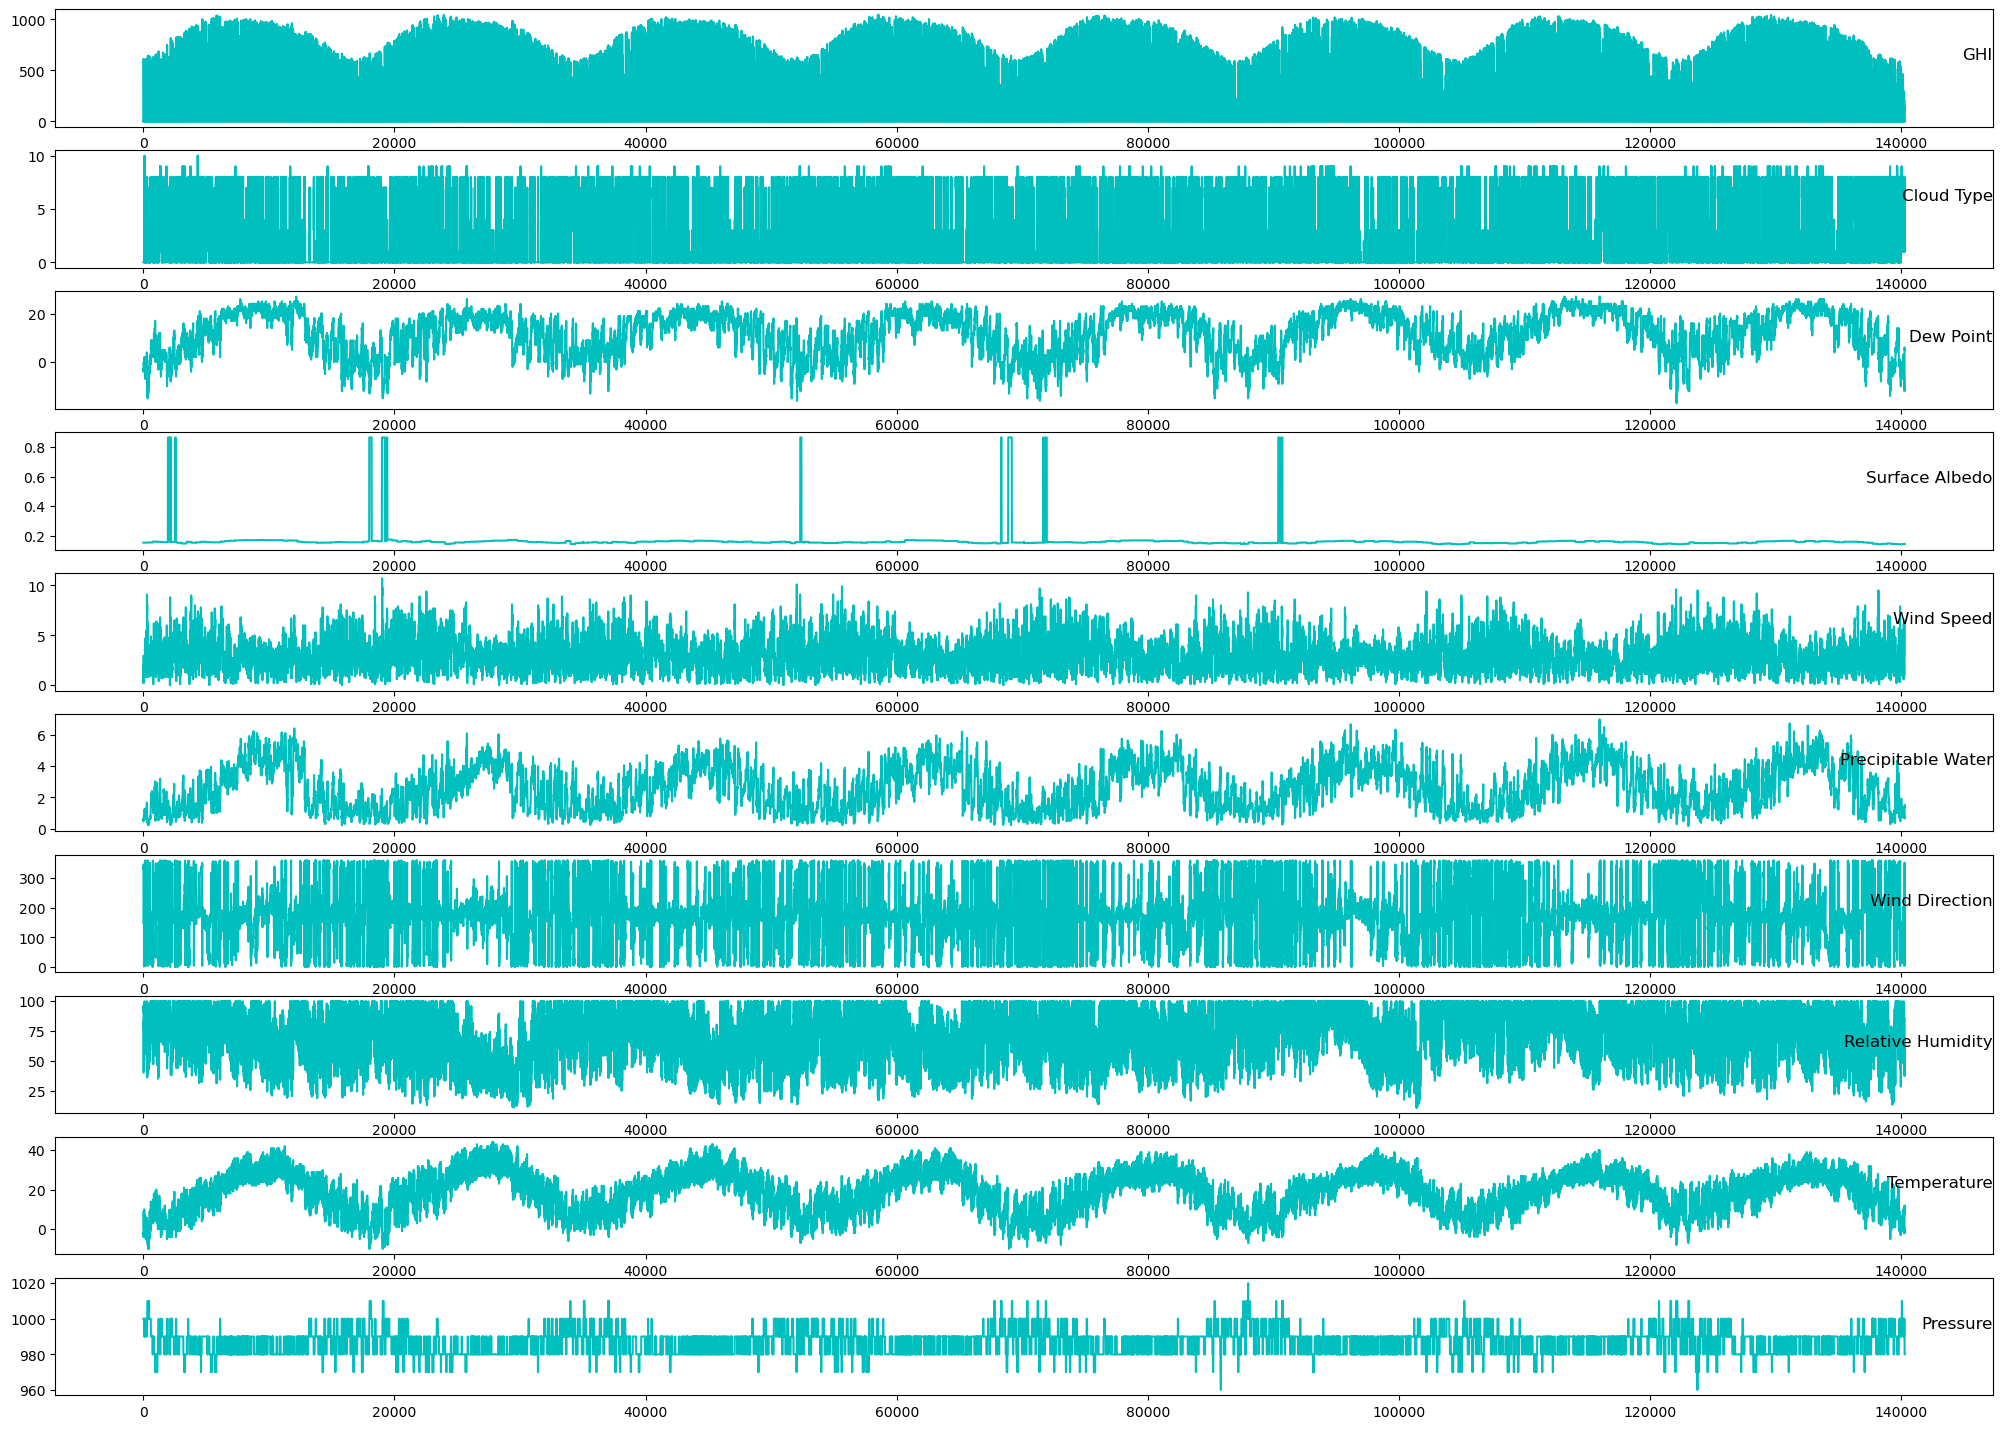

In [15]:
from matplotlib import pyplot

values = all_data.values
# specify columns to plot
groups = [x for x in range(0, len(all_data.columns))]
i = 1
# plot each column
pyplot.figure(figsize=(25,18))
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group], 'c')
    pyplot.title(all_data.columns[group], y=0.5, loc='right')
    i += 1
pyplot.show();

In [16]:
all_data['Cloud Type'].value_counts()

0     66266
7     15355
1     15336
3     12272
8     10900
4      9764
6      5878
2      3502
9       981
10        2
Name: Cloud Type, dtype: int64

In [17]:
all_data = all_data.astype('float32')
all_data.dtypes

GHI                   float32
Cloud Type            float32
Dew Point             float32
Surface Albedo        float32
Wind Speed            float32
Precipitable Water    float32
Wind Direction        float32
Relative Humidity     float32
Temperature           float32
Pressure              float32
dtype: object

In [18]:
all_data['y'] = all_data.GHI.shift(-1) # Using t obs to predict GHI at t+1
all_data.tail(30)

,GHI,Cloud Type,Dew Point,Surface Albedo,Wind Speed,Precipitable Water,Wind Direction,Relative Humidity,Temperature,Pressure,y
timestamp,,,,,,,,,,,
2017-12-31 09:00:00,214.0,4.0,-9.0,0.143,6.3,0.825,11.800000,52.209999,-1.0,1000.0,45.0
2017-12-31 09:30:00,45.0,4.0,-9.0,0.143,6.4,0.806,11.800000,52.240002,-1.0,1000.0,57.0
2017-12-31 10:00:00,57.0,4.0,-10.0,0.143,6.5,0.788,9.400000,48.750000,-1.0,1000.0,85.0
2017-12-31 10:30:00,85.0,4.0,-10.0,0.143,6.5,0.769,9.400000,45.330002,0.0,1000.0,70.0
2017-12-31 11:00:00,70.0,4.0,-11.0,0.143,6.5,0.750,8.400000,42.240002,0.0,1000.0,65.0
2017-12-31 11:30:00,65.0,4.0,-11.0,0.143,6.4,0.733,8.400000,42.220001,0.0,1000.0,86.0
2017-12-31 12:00:00,86.0,4.0,-12.0,0.143,6.4,0.717,7.800000,39.860001,0.0,1000.0,102.0
2017-12-31 12:30:00,102.0,4.0,-12.0,0.143,6.3,0.703,7.800000,39.849998,0.0,1000.0,86.0
2017-12-31 13:00:00,86.0,4.0,-12.0,0.143,6.3,0.690,7.300000,38.529999,0.0,1000.0,116.0


In [19]:
# all_data['Solar Zenith Angle'] = all_data['Solar Zenith Angle'].diff(1)
all_data.dropna(axis = 0, inplace =True)

* We can use more than one column to predict GHI the next 30 mins. But for simplicity I will drop all columns for you and just use GHI to predict itslef. This is acalled univariate(only one variable) time series modelling

## Final Data

* This is the data you will need to model in order to forecast the next

In [21]:
final_df = all_data[["GHI"]]

* If you want to validate on your own data, break the data into train and validation set. The validation set is what you can predict and directly check how are you performing on data you set aside that the model hasnt seen:

In [33]:
break_point = 365 * 24 * 2 * 6 # Days * Hours/Day * 30Minutes/hour * Years ; 2017 is left to validate the model
train_2010_2016 = final_df.iloc[:break_point]
val_2017 = final_df.iloc[break_point:]

## Time Series Modelling Competition 

### Competition details
* Your modelling will start here and will try different models that give smallest error
* Build many models and predict the next `17519 data points` into the future. Basically you are predicting the next years' solar enegery data every 30 minutes.
* Save your predictions to csv. Make sure to have only one column in that csv, no need for the datetimes and make sure you predicted `17519 data points`
* Go to the tool I built on the web app I keep developing for you. Go there and upload your predictions to get your predictions error as shown below:
![Time](Images/Instructions.png)

In [51]:
# Metric used to calculate error
def rmse(preds,target):
    if (len(preds)!=len(target)):
        raise AttributeError('list1 and list2 must be of same length')
    return round(((sum((preds[i]-target[i])**2 for i in range(len(preds)))/len(preds)) ** 0.5),2)

* Imagine this is my model (very simple one):

`In your case this is the beef of the competition, the modelling from various packages`

In [34]:
model = mean(train_2010_2016.GHI)
# my model just predicts historic average always, very dummy baseline model
model

207.27317810058594

* I validate my model on a set I set aside and check the errors it made on its true labels

In [70]:
average_model_validation_predictions = pd.Series(model, val_2017.index,name = "Prediction").to_frame()
df1_styler = average_model_validation_predictions.head(100).style.set_table_attributes("style='display:inline'").set_caption('Validation Predictions')
df2_styler = val_2017.head(100).style.set_table_attributes("style='display:inline'").set_caption('Real Values of Validation Set')

display_html(df1_styler._repr_html_()+df2_styler._repr_html_(), raw=True)

,Prediction
timestamp,
2015-12-31 00:00:00,207.273178
2015-12-31 00:30:00,207.273178
2015-12-31 01:00:00,207.273178
2015-12-31 01:30:00,207.273178
2015-12-31 02:00:00,207.273178
2015-12-31 02:30:00,207.273178
2015-12-31 03:00:00,207.273178
2015-12-31 03:30:00,207.273178
2015-12-31 04:00:00,207.273178


In [71]:
validation_error = rmse(average_model_validation_predictions.Prediction.values, val_2017.GHI.values)
print(f'Average Model RootMeanSquaredError: {validation_error:.3f}')
print(f"This means I expect to be off by {validation_error:.3f} units everytime I make a prediction in the future")

Average Model RootMeanSquaredError: 289.930
This means I expect to be off by 289.930 units everytime I make a prediction in the future


* Ok Imagine I am satisifed with this error (offcourse the closer to 0 the better)
* Then you predict the next 17519 points/ 30 mins in the future
* You will let the model predict to the future not like I did len(17519) * model. Remember what we did with prophet, you tell it how many points to predict to the future.

In [65]:
future_predictions = pd.DataFrame({'GHI': [model] * 17519})
future_predictions.to_csv("team_x_v1_predictions.csv")


* Upload predictions to the above stated tool to get you error on unseen data and write it down to compare with other teams

### Let the competition begin!
![Meme](Images/Compete.png)